# Instancia de librarias

In [81]:
import pandas as pd
import numpy as np
# import datetime as dt
from datetime import datetime

import scipy.stats as stats
import statistics

import warnings
warnings.filterwarnings('ignore')

# Formato de visualización por centenas
pd.options.display.float_format = '{:,.2f}'.format

# Graficas
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set_theme(color_codes=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots


print("Setup complete")

Setup complete


# Importación de datos

In [2]:
path = r'data/Walmart_Store_sales.csv'
wall_data = pd.read_csv(path, header=0, encoding='utf-8')

# Análisis exploratorio

In [3]:
# Se identifica el número de variables y observaciones del dataset
print("Número de observaciones:", wall_data.shape[0])
print("Número de variables:", wall_data.shape[1])
print("Variables",wall_data.keys())

Número de observaciones: 6435
Número de variables: 8
Variables Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [4]:
# Se muestra el tipo de valor de cada variable
# y si existen valores nulos
wall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Establecer el número de filas de la muestra
muestra = int(wall_data.shape[0]*.60)

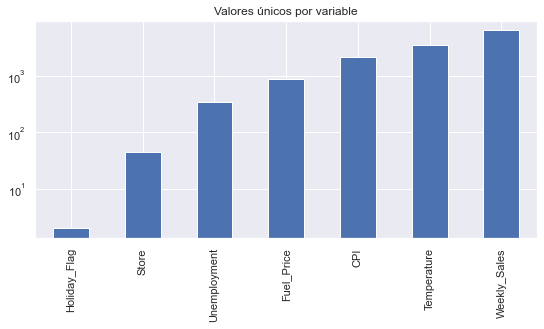

In [6]:
# Se  identifica el número de valores unicos por variable. Solo para las que tienen valores numericos
wall_data.value_counts(wall_data.dtypes)
unq_val = wall_data.select_dtypes(include='number').nunique().sort_values()
unq_val.plot.bar(logy=True, figsize=(9,4),title="Valores únicos por variable");

In [16]:
# Verificando los valores únicos de las fechas que no se tomaron en cuenta en la celda anterior
# La variable Date se esta consideranco como un objeto de strings.
# wall_data.groupby('Date')[['Store']].nunique().sort_values(by = "Store")

# Se obtienen los valores únicos de las fechas (semanas) 
# wall_data['Date'].unique() 

# Se cuentan los valores únicos de las fechas (semanas) 
wall_data['Date'].nunique() #<- 143
# Hay 143 semanas en que se registron las ventas (en día viernes)
#-> 143*45(tiendas) = 6435 observaciones
# Corroboración. Verificamos que la desviación estandar sea cero
# wall_data.Store.value_counts().std() # <- 0

143

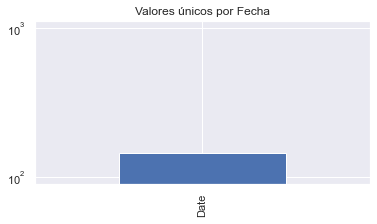

In [15]:
# Se gráfica la cantidad de semanas por tienda
unq_val = wall_data.select_dtypes(include='object').nunique().sort_values()
unq_val.plot.bar(logy=True, figsize=(6,3),title="Valores únicos por Fecha");

In [17]:
# Se verifica el tipo de valores que se  muestran por variable.
wall_data.sample(5,random_state=muestra)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5306,38,21-05-2010,"340,497.08",0,76.20,3.12,126.18,14.10
2441,18,16-04-2010,"1,135,577.62",0,50.26,2.88,131.98,9.27
5183,37,08-10-2010,"524,483.65",0,66.34,2.63,210.51,8.48
897,7,05-11-2010,"480,512.44",0,49.44,2.73,191.00,9.14
3194,23,07-01-2011,"1,122,034.48",0,27.81,3.19,132.88,5.11


In [18]:
# Se renombran las columnas y muetsra el encabezado
wall_data.columns = ["tienda","fecha","vta_semana","feriado","temp","precio_gasolina_reg","ipc","tasa_desempleo"]
wall_data.head(3)

,tienda,fecha,vta_semana,feriado,temp,precio_gasolina_reg,ipc,tasa_desempleo
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11


In [ ]:
# Se convierte la temperatura de °F a °C
# print("Max: ",wall_data['temp'].max(),"Min: ",wall_data['temp'].min())
wall_data['temp'] = (wall_data['temp']-32)*(5/9)
wall_data['temp'].head()

In [ ]:
# Se convierte el precio de la gasolina de galones a litros X dolar
# print("Max: ",wall_data['precio_gasolina_reg'].max(),"Min: ",wall_data['precio_gasolina_reg'].min())
wall_data['precio_gasolina_reg'] = (wall_data['precio_gasolina_reg'] / 3.785412)
wall_data['precio_gasolina_reg'].head()

# Posiblemente se pueda consumir un api que le pase la fecha y proporcione el precio del dolar ese día

In [ ]:
# Se cambia el tipo de valor a la variable fecha de str a date
# wall_data['fecha']
wall_data['fecha'] = pd.to_datetime(wall_data['fecha'],format="%d-%m-%Y", dayfirst=True)
wall_data['fecha'] # año - mes - dia


In [19]:
# Se verifica el tipo de valores que tiene el dataset
pd.value_counts(wall_data.dtypes)

float64    5
int64      2
object     1
dtype: int64

# Corroboración de valores ausentes

In [20]:
wall_data.isna().sum()

tienda                 0
fecha                  0
vta_semana             0
feriado                0
temp                   0
precio_gasolina_reg    0
ipc                    0
tasa_desempleo         0
dtype: int64

# Verificando periodicidad de fechas

In [21]:
# wall_data[wall_data['fecha']=="2010-02-05"] # Inicio del registro de semana - viernes - febrero 2010
# wall_data[wall_data['fecha'] == "2012-10-26"] # Registro de última semana - viernes - octubre 2012
# wall_data[wall_data['fecha'] >= "2012-11-02"] # No hay registros
wall_data.groupby(['fecha']).size() # 45 (tiendas)*143 semanas = 6435 registros

fecha
01-04-2011    45
01-06-2012    45
01-07-2011    45
01-10-2010    45
02-03-2012    45
              ..
30-07-2010    45
30-09-2011    45
30-12-2011    45
31-08-2012    45
31-12-2010    45
Length: 143, dtype: int64

In [22]:
# Función que separa fechas por periodos de tiempo
def periodo_tiempo (df,f1,f2):
    periodo = df[(df['fecha']>=f1) & (df['fecha']<=f2)].iloc[:,0:4] 
    return periodo

### La tienda con el máximo de ventas registradas es:

In [23]:
# La tienda con el máximo número de ventas registradas en una semana:
# wall_data.groupby('tienda')[['vta_semana']].max().sort_values(by = 'vta_semana', ascending = False)
wall_data.groupby('tienda')[['vta_semana']].max().sort_values(by = 'vta_semana', ascending = False).reset_index().iloc[0,:]
# wall_data.groupby('vta_semana').get_group(3818686.45)
# wall_data[(wall_data['tienda']==14) & (wall_data['vta_semana']==3818686.45)]


tienda              14.00
vta_semana   3,818,686.45
Name: 0, dtype: float64

In [24]:
# La tienda con el máximo número de ventas registradas de"2010-02-05" al "2012-10-26":
wall_data.groupby('tienda')[['vta_semana']].sum().sort_values(by = 'vta_semana', ascending = False).reset_index().iloc[0,:]

tienda                20.00
vta_semana   301,397,792.46
Name: 0, dtype: float64

In [87]:
# Maximo de ventas por semana
max_vta_semana = wall_data.groupby('tienda')[['vta_semana']].max().sort_values(by = 'tienda').reset_index()
# Maximo de ventas en todo el periodo
max_vtas = wall_data.groupby('tienda')[['vta_semana']].sum().sort_values(by = 'tienda').reset_index()

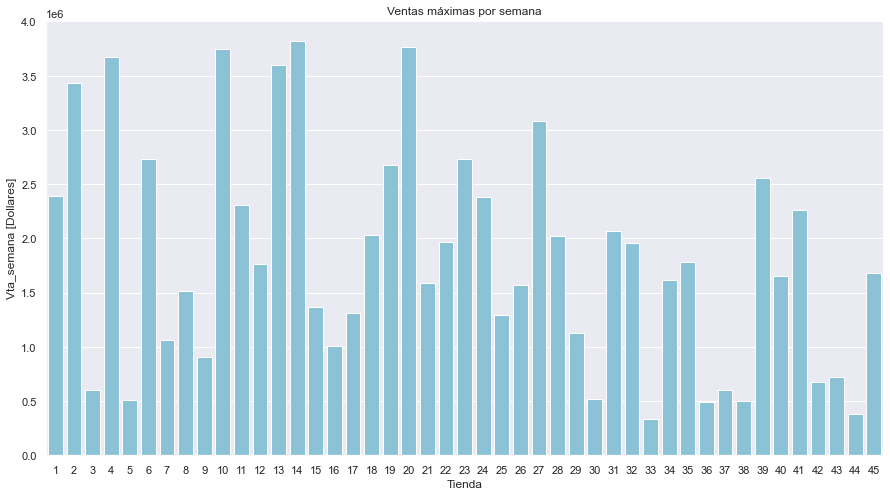

In [88]:
# Se gráfica el monto de venta por semana de cada tienda
plt.figure(figsize=(15,8))
plt.title('Ventas máximas por semana')
sns.barplot(data = max_vta_semana,x = 'tienda',y='vta_semana', color='#7EC8E3')
plt.xlabel('Tienda')
plt.ylabel('Vta_semana [Dollares]')
plt.show()

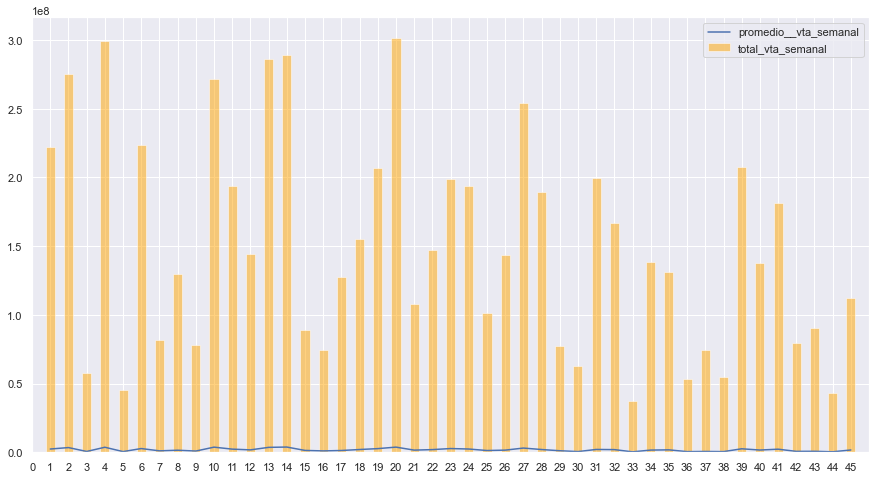

In [89]:
plt.figure(figsize=(15,8))
plt.plot(max_vta_semana.tienda,max_vta_semana.vta_semana,label='promedio__vta_semanal')
plt.bar(max_vtas.tienda,max_vtas.vta_semana,width=0.5,alpha=0.5,color='orange',label='total_vta_semanal')
plt.xlim(1,46)
plt.xticks(range(0,46,1))
plt.legend(loc='upper right')
plt.show()

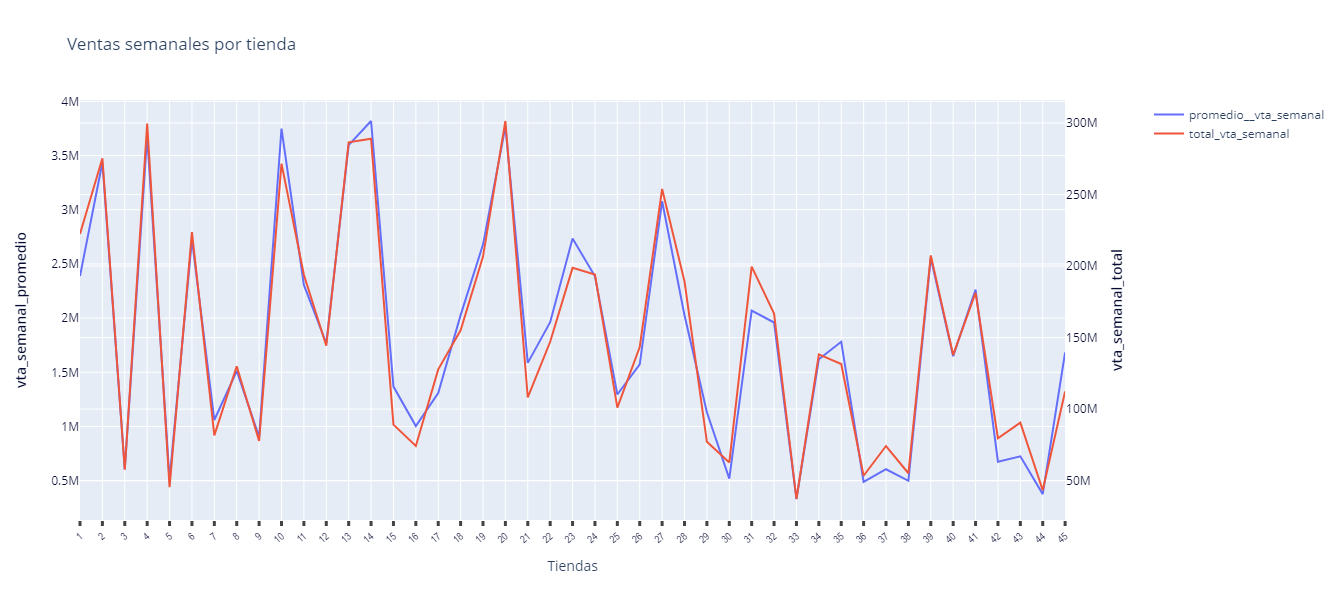

In [176]:

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x = max_vta_semana.tienda,y = max_vta_semana.vta_semana, name="promedio__vta_semanal"),
    secondary_y=False
)


fig.add_trace(
    go.Scatter(x = max_vtas.tienda,y = max_vtas.vta_semana, name="total_vta_semanal"),
    secondary_y=True
)

fig.update_layout(
    title_text="Ventas semanales por tienda",
    width = 1000, height = 600
)


fig.update_xaxes(title_text="Tiendas", range = [1,45], ticks='outside',ticklen=5, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=10.5,color='#050A30'))

# plt.xlim(0,143)
# plt.xticks(range(0,143,5))
fig.update_yaxes(title_text="<b>vta_semanal_promedio</b>", secondary_y=False,color='#050A30')
fig.update_yaxes(title_text="<b>vta_semanal_total</b>", secondary_y=True,color='#050A30')

fig.show()

In [ ]:
# Se gráfica el monto de venta por todo el periodo por cada tienda:
# "2010-02-05" - 2012-10-26"
plt.figure(figsize=(15,8))
plt.title('Ventas máximas en todo el periodo:2010-2012')
sns.barplot(data = max_vtas,x = 'tienda',y='vta_semana')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales [Dollares]')
plt.show()

### La tienda con la desviación estadar máxima fue:

In [ ]:
# La distribución de los datos del dataset es:
# wall_data.plot(lw=0, marker=".",subplots=True,layout=(-1,4),figsize=(15,30),markersize=2.5)

# La disribucion de los datos referente a las ventas por semana de todas las observaciones es:
wall_data.iloc[:,[2]].plot(lw=0, marker=".",layout=(-1,4),figsize=(14,6),markersize=3.5)


In [ ]:
# Se obtiene la desviación estandar de las ventas por semana vta_semana
std_des = wall_data.groupby('tienda')['vta_semana'].aggregate(['std','mean']).reset_index().sort_values(by = 'std', ascending=False)
std_des["cv"] = (std_des['std']/std_des['mean']) * 100
top_5_std_des = std_des.head(5)

In [ ]:
top_5_std_des

In [ ]:
# wall_data[wall_data['tienda']==14].iloc[:,[2]]
plt.figure(figsize=(10,8))
sns.distplot(wall_data[wall_data['tienda']==14].iloc[:,[2]])
plt.title('Distribución de ventas, tienda 14')
plt.xlabel('Ventas [Dolares]')
plt.show()

In [ ]:
# std_des.sort_values(by='cv', ascending=False)
# std_des.sort_values(by='cv') #<-37
plt.figure(figsize=(10,8))
sns.distplot(wall_data[wall_data['tienda']==37].iloc[:,[2]])
plt.title('Distribución de ventas, tienda 37')
plt.xlabel('Ventas [Dolares]')
plt.show()

### Ventas por semanas de una tienda

In [ ]:
# Son 143 semanas
# El registro de datos se compone por todos los ingresos de ventas en día viernes de 2010 al 2012
# por cada tienda de forma ascendente
# Para la tienda 1 febrero 2010 a octubre de 2012
# Por ejemplo:
# wall_data.iloc[0:143,:] # Corresponden a la tienda UNO

# Para la tienda 1 febrero 2010 a octubre de 2012
# wall_data.iloc[0:143,:]
plt.figure(figsize=(16,10))
plt.plot(wall_data.iloc[0:143,[2]],color='blue')
plt.xlim(0,143)
plt.xticks(range(0,143,5))
plt.title("Tienda 1 Semanas:2010 - 2012")
plt.xlabel("Semanas")
plt.ylabel("Dolares")
plt.show()

In [ ]:
wall_data.iloc[0:143,[2]]

### Ventas por cada año

#### 2010

In [ ]:
# Por año. 2010
# data = wall_data.iloc[0:6435,[2]]
vta_2010 = periodo_tiempo(wall_data,"2010-02-05","2010-12-31")
# vta_2010 = vta_2010.groupby(['fecha'])[['vta_semana']].sum().reset_index()
vta_2010['año']= pd.DatetimeIndex(vta_2010['fecha']).year
vta_2010['mes']=pd.DatetimeIndex(vta_2010['fecha']).month
vta_2010['semana']=pd.DatetimeIndex(vta_2010['fecha']).week

# vta_2010['mes'].strftime('%B') 
# ->AttributeError: 'Series' object has no attribute 'datetime'

mes_str = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',\
           7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
vta_2010['mes'] = vta_2010['mes'].apply(lambda x: mes_str[x])
# vta_2010
vta_2010.groupby('mes').ngroups # para todo el periodo sería por año
# vta_2010.groupby(['mes','tienda'])['vta_semana'].aggregate([sum,'mean']).iloc[0:46,:]
vta_2010_mesual = vta_2010.groupby(['mes'])['vta_semana'].aggregate([sum,'mean']).sort_values(by='sum',ascending=False).reset_index()
vta_2010_mesual

#### 2011

In [ ]:
# Por año. 2011
# data = wall_data.iloc[0:6435,[2]]
vta_2011 = periodo_tiempo(wall_data,"2011-01-07","2011-12-30")
# vta_2011 = vta_2011.groupby(['fecha'])[['vta_semana']].sum().reset_index()
vta_2011['año']= pd.DatetimeIndex(vta_2011['fecha']).year
vta_2011['mes']=pd.DatetimeIndex(vta_2011['fecha']).month
vta_2011['semana']=pd.DatetimeIndex(vta_2011['fecha']).week
# vta_2011['mes'].strftime('%B') 
# ->AttributeError: 'Series' object has no attribute 'datetime'
mes_str = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',\
           7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
vta_2011['mes'] = vta_2011['mes'].apply(lambda x: mes_str[x])
# vta_2011
vta_2011.groupby('mes').ngroups # para todo el periodo sería por año
# vta_2011.groupby(['mes','tienda'])['vta_semana'].aggregate([sum,'mean']).iloc[0:46,:]
vta_2011_mesual = vta_2011.groupby(['mes'])['vta_semana'].aggregate([sum,'mean']).sort_values(by='sum',ascending=False).reset_index()
vta_2011_mesual

#### 2012

In [ ]:
# Por año. 2012
# data = wall_data.iloc[0:6435,[2]]
vta_2012 = periodo_tiempo(wall_data,"2012-01-06","2012-10-26")
# vta_2012 = vta_2012.groupby(['fecha'])[['vta_semana']].sum().reset_index()
vta_2012['año']= pd.DatetimeIndex(vta_2012['fecha']).year
vta_2012['mes']=pd.DatetimeIndex(vta_2012['fecha']).month
vta_2012['semana']=pd.DatetimeIndex(vta_2012['fecha']).week
# vta_2012['mes'].strftime('%B') 
# ->AttributeError: 'Series' object has no attribute 'datetime'
mes_str = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',\
           7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
vta_2012['mes'] = vta_2012['mes'].apply(lambda x: mes_str[x])
# vta_2012
vta_2012.groupby('mes').ngroups # para todo el periodo sería por año
# vta_2012.groupby(['mes','tienda'])['vta_semana'].aggregate([sum,'mean']).iloc[0:46,:]
vta_2012_mesual = vta_2012.groupby(['mes'])['vta_semana'].aggregate([sum,'mean']).sort_values(by='sum',ascending=False).reset_index()
vta_2012_mesual

#### Gráficas de las ventas por cada año

In [ ]:
# Grafica de ventas mensuales del 2010
plt.figure(figsize=(12,8))
plt.title('Ventas mensuales 2010')
sns.barplot(x=vta_2010_mesual.iloc[:,0],y=vta_2010_mesual.iloc[:,1])
plt.xlabel('mes')
plt.ylabel('Ventas [Dolares]')
plt.show()

In [ ]:
# Grafica de ventas mensuales del 2011
plt.figure(figsize=(12,8))
plt.title('Ventas mensuales 2011')
sns.barplot(x=vta_2011_mesual.iloc[:,0],y=vta_2011_mesual.iloc[:,1])
plt.xlabel('mes')
plt.ylabel('Ventas [Dolares]')
plt.show()

In [ ]:
# Grafica de ventas mensuales del 2012
plt.figure(figsize=(12,8))
plt.title('Ventas mensuales 2012')
sns.barplot(x=vta_2012_mesual.iloc[:,0],y=vta_2012_mesual.iloc[:,1])
plt.xlabel('mes')
plt.ylabel('Ventas [Dolares]')
plt.show()

### Ventas de todo el periodo 2010-2012

In [ ]:
# Se crea un nuevo dataset (wall_data_2) que contega los agrupamientos de vta_2010
# vta_2011,vta_2012
wall_data_2 = pd.concat([vta_2010,vta_2011,vta_2012])
wall_data_2['año'] = pd.DatetimeIndex(wall_data_2['fecha']).year
wall_data_2['mes'] = pd.DatetimeIndex(wall_data_2['fecha']).month
wall_data_2['semana'] = pd.DatetimeIndex(wall_data_2['fecha']).week
wall_data_2['mes'] = wall_data_2['mes'].apply(lambda x: mes_str[x])

# En las siguientes líneas se puede contar el número de grupos por año, agrupar por año el dataset
# y despues obtener el grupo de cada año y guardarlo en cada variable
# wall_data_2.groupby('año').ngroups #->3
# vta_2010_2= wall_data_2.groupby('año').get_group(2010)

vta_2010_2=wall_data_2[wall_data_2['año']==2010]
vta_2011_2=wall_data_2[wall_data_2['año']==2011]
vta_2012_2=wall_data_2[wall_data_2['año']==2012]

# # vta_2010.groupby(['mes','tienda'])['vta_semana'].aggregate([sum,'mean']).iloc[0:46,:]
# vta_2010_mesual = vta_2010.groupby(['mes'])['vta_semana'].aggregate([sum,'mean']).sort_values(by='sum',ascending=False).reset_index()
# vta_2010_mesual

#### Ventas por semana de 2010

In [ ]:
vta_2010_semana = vta_2010_2.groupby('semana')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(28,8))

ax = sns.barplot(x='semana', y='vta_semana',
                 data=vta_2010_semana,
                 errwidth=0)
plt.title('Ventas semanales 2010')
plt.xlabel('semana')
plt.ylabel('Ventas [Dolares]')

for index, row in vta_2010_semana.iterrows():
    ax.text(row.name, row.semana, round((row.vta_semana/10000000), 2),
            color='black', ha='center')

# Días festivos
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13       1-Trimestre
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13         3-Trimestre
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13    4-Trimestre
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13       4-Trimestre

#### Ventas por semana de 2011

In [ ]:
vta_2011_semana = vta_2011_2.groupby('semana')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(28,8))

ax = sns.barplot(x='semana', y='vta_semana',
                 data=vta_2011_semana,
                 errwidth=0)
plt.title('Ventas semanales 2011')
plt.xlabel('semana')
plt.ylabel('Ventas [Dolares]')

for index, row in vta_2011_semana.iterrows():
    ax.text(row.name, row.semana, round((row.vta_semana/10000000), 2),
            color='black', ha='center')
# Días festivos
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13       1-Trimestre
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13         3-Trimestre
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13    4-Trimestre
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13       4-Trimestre

#### Ventas por semana de 2012

In [ ]:
vta_2012_semana = vta_2012_2.groupby('semana')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(28,8))

ax = sns.barplot(x='semana', y='vta_semana',
                 data=vta_2012_semana,
                 errwidth=0)
plt.title('Ventas semanales 2012')
plt.xlabel('semana')
plt.ylabel('Ventas [Dolares]')

for index, row in vta_2012_semana.iterrows():
    ax.text(row.name, row.semana, round((row.vta_semana/10000000), 2),
            color='black', ha='center')
# Días festivos
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13       1-Trimestre
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13         3-Trimestre
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13    4-Trimestre
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13       4-Trimestre

### Trimestres / Quartiles de año

In [ ]:
# Se crea una columna pivote (trimestre) para categorizar cad trimestre segun el mes
vta_2012_2['trimestre']='t'
# -----------------TODO-------------
# SI NO SE POPNE STR CON REPLACE PARA TEXTOS
vta_2012_2['trimestre'] = vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'enero') | (vta_2012_2['mes']=='febrero')|(vta_2012_2['mes']=='marzo')].str.replace('t','t1')
# vta_2012_2['trimestre'] = vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'abril') | (vta_2012_2['mes']=='mayo')|(vta_2012_2['mes']=='junio')].replace('t','t2')
# el metodo replace sólo funciona en series o en sustituyendo todo los NaN en todo el dataframe, por eso sustituyo directamente en la columna trimestre el valor
# que necesito con base a la igualdad de la columna mes que cumpla con los meses.
vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'abril') | (vta_2012_2['mes']=='mayo')|(vta_2012_2['mes']=='junio')] = 't2'
vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'julio') | (vta_2012_2['mes']=='agosto')|(vta_2012_2['mes']=='septiembre')] = 't3'
vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'octubre') | (vta_2012_2['mes']=='noviembre')|(vta_2012_2['mes']=='diciembre')] = 't4'

vta_2012_2
# ------------------------------------------------------------------------------ #
# for i in vta_2012_2['mes']:
#     if i in ['enero','febrero','marzo']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t1'
#     elif i in ['abril','mayo','junio']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t2'
#     elif i in ['julio','agosto','septiembre']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t3'
#     elif i in ['octubre','noviembre','diciembre']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t4'
# vta_2012_2['mes']
# vta_2012_2[vta_2012_2['mes']==i].index
# vta_2012_2['mes'][vta_2012_2[vta_2012_2['mes']==i].index]
# ------------------------------------------------------------------------------ #

In [ ]:
# TODO PROBAR CON CARACTER VACIO
# Se utilia el criterio de la celda anterior pero ya no es necesario usr el replace
vta_2011_2['trimestre']='t'
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'enero') | (vta_2011_2['mes']=='febrero')|(vta_2011_2['mes']=='marzo')] = 't1'
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'abril') | (vta_2011_2['mes']=='mayo')|(vta_2011_2['mes']=='junio')] = 't2'
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'julio') | (vta_2011_2['mes']=='agosto')|(vta_2011_2['mes']=='septiembre')] = 't3'
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'octubre') | (vta_2011_2['mes']=='noviembre')|(vta_2011_2['mes']=='diciembre')] = 't4'

vta_2011_2


In [ ]:
      
vta_2010_2['trimestre']='t'
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'enero') | (vta_2010_2['mes']=='febrero')|(vta_2010_2['mes']=='marzo')] = 't1'
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'abril') | (vta_2010_2['mes']=='mayo')|(vta_2010_2['mes']=='junio')] = 't2'
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'julio') | (vta_2010_2['mes']=='agosto')|(vta_2010_2['mes']=='septiembre')] = 't3'
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'octubre') | (vta_2010_2['mes']=='noviembre')|(vta_2010_2['mes']=='diciembre')] = 't4'

vta_2011_2


In [ ]:
vta_2010_2

### Ventas por trimestres

#### 2010

In [ ]:
vta_2010_trim = vta_2010_2.groupby('trimestre')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(12,8))
plt.title('Ventas trimestrales 2010')
sns.barplot(x='trimestre',y='vta_semana',data=vta_2010_trim)
plt.xlabel('trimestre')
plt.ylabel('Ventas [Dolares]')
plt.show()

#### 2011

In [ ]:
vta_2011_tri=vta_2011_2.groupby('trimestre')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(12,8))
plt.title('Ventas trimestrales 2011')
sns.barplot(x='trimestre',y='vta_semana',data=vta_2011_tri)
plt.xlabel('trimestre')
plt.ylabel('Ventas [Dolares]')
plt.show()

#### 2012

In [ ]:
vta_2012_tri=vta_2012_2.groupby('trimestre')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(12,8))
plt.title('Ventas trimestrales 2012')
sns.barplot(x='trimestre',y='vta_semana',data=vta_2012_tri)
plt.xlabel('trimestre')
plt.ylabel('Ventas [Dolares]')
plt.show()

#### Análisis anual

In [ ]:
vta_anual = wall_data_2.groupby('año')[['vta_semana']].sum().reset_index()
# vta_anual
plt.figure(figsize=(12,8))
plt.title('Ventas anuales 2010 - 2012')
sns.barplot(x='año',y='vta_semana',data=vta_anual)
plt.xlabel('año')
plt.ylabel('Ventas [Dolares]')
plt.show()

### Análisis de los trimestres de 2012

#### Tercer trimestre

In [ ]:
# vta_2012_2 # 
# periodo_tiempo(vta_2012_2,"2012-07-06","2012-09-28").groupby('tienda')['vta_semana'].sum()
# t2_2012 = vta_2012_2.groupby('trimestre').get_group('t2').groupby('tienda')[['vta_semana']].sum().reset_index()
# Con reset_index() las observaciones empiezan en cero y para graficar amabs gráficas necesitamos que empiece
# por el número de tienda
t2_2012 = vta_2012_2.groupby('trimestre').get_group('t2').groupby('tienda')[['vta_semana']].sum()
t3_2012 = vta_2012_2.groupby('trimestre').get_group('t3').groupby('tienda')[['vta_semana']].sum()

In [ ]:
# Tiendas con diferencia negativa en sus vetas entre el trimestre 2 y 3:
# round(t3_2012.groupby('tienda').get_group(1).iloc[0,0]-t2_2012.groupby('tienda').get_group(1).iloc[0,0],2) #<- -724,812.34
# round(t3_2012.groupby('tienda').get_group(4).iloc[0,0]-t2_2012.groupby('tienda').get_group(4).iloc[0,0],2) #<- -657,571.21
# round(t3_2012.groupby('tienda').get_group(14).iloc[0,0]-t2_2012.groupby('tienda').get_group(14).iloc[0,0],2) #<- -3,967,974.76

# Tiendas con diferencia positiva en sus vetas entre el trimestre 2 y 3:
# round(t3_2012.groupby('tienda').get_group(7).iloc[0,0]-t2_2012.groupby('tienda').get_group(7).iloc[0,0],2) #<- 971,928.12
# round(t3_2012.groupby('tienda').get_group(26).iloc[0,0]-t2_2012.groupby('tienda').get_group(26).iloc[0,0],2) #<- 520,356.34
round(t3_2012.groupby('tienda').get_group(39).iloc[0,0]-t2_2012.groupby('tienda').get_group(39).iloc[0,0],2) #<- 500987.77

In [ ]:
plt.rcParams["figure.figsize"] = (18,8)
t2_2012.plot(ax = t3_2012.plot(kind='bar',legend=True), kind='bar',color='c',alpha=0.4, legend=True);
plt.legend(['t3-2012','t2-2012']);
plt.show()

In [ ]:
t2_2012_2 = vta_2012_2.groupby('trimestre').get_group('t2').groupby('tienda')[['vta_semana']].sum().reset_index()
t3_2012_2 = vta_2012_2.groupby('trimestre').get_group('t3').groupby('tienda')[['vta_semana']].sum().reset_index()
t2_2012_2.columns = ['tienda','vta_semana_t2']
t3_2012_2.columns = ['tienda','vta_semana_t3']

In [ ]:
trimestres_2_3_2012 = pd.concat([t2_2012_2,t3_2012_2],axis=1)
trimestres_2_3_2012 = trimestres_2_3_2012.iloc[:,[0,1,3]]
trimestres_2_3_2012['diferencia'] = trimestres_2_3_2012['vta_semana_t3']-trimestres_2_3_2012['vta_semana_t2']
trimestres_2_3_2012['tasa_crecimiento'] = ((trimestres_2_3_2012['vta_semana_t3']-trimestres_2_3_2012['vta_semana_t2'])/trimestres_2_3_2012['vta_semana_t3'])*100
# trimestres_2_3_2012

In [ ]:
trimestres_2_3_2012.sort_values(by ='diferencia', ascending= False).head(5)
# La tienda con un mayor crecimiento entre el trimestre 2 y 3 es la 7

In [ ]:
# trimestres_2_3_2012.sort_values(by ='vta_semana_t3', ascending= False)
# trimestres_2_3_2012.sort_values(by ='diferencia', ascending= False)[trimestres_2_3_2012['tienda']==4]
print(trimestres_2_3_2012.sort_values(by ='diferencia', ascending= False)[trimestres_2_3_2012['tienda']==4])
# La tienda con mayor crecimiento en el trimestre  3 es la 4 pero 
# tuvo una diferencia negativa en sus ganancias respecto al segundot trimestre.

In [ ]:
trimestres_2_3_2012.sort_values(by ='vta_semana_t3', ascending= False).head(8)
print(trimestres_2_3_2012.sort_values(by ='vta_semana_t3', ascending= False)[trimestres_2_3_2012['tienda']==39])
# La tienda 39 tuvo mejores ventas en el tercer trimestre del 2012 y
# sus ganancias son positivas respecto al segundo trimestre

### Análisis por temporadas

In [ ]:

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12      1-Trimestre
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12        3-Trimestre
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12    4-Trimestre
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12       4-Trimestre

In [ ]:
# Se genera una variable con el contenido del dataset wall_data2 y se agrega la columna dia
wall_data_3 = wall_data_2
wall_data_3['dia'] =pd.DatetimeIndex(wall_data_3['fecha']).day
# Se crean variables con los valores del dataset correspondientes a los días festivos
# Días festivos
# wall_data_3[((wall_data_3['dia'] == 12 )|(wall_data_3['dia'] == 11 )|(wall_data_3['dia'] == 10)|(wall_data_3['dia'] == 8)) & (wall_data_3['mes']=='febrero')]
# wall_data_3[(wall_data_3['fecha']=='2010-02-12')|(wall_data_3['fecha']=='2011-02-11')|(wall_data_3['fecha']=='2012-02-10')]
# sb = ['2010-02-12','2011-02-11','2012-02-10']
# wall_data_3.loc[wall_data_3.fecha.isin(sb)]
spbowl = wall_data_3[(wall_data_3['fecha']=='2010-02-12')|(wall_data_3['fecha']=='2011-02-11')|(wall_data_3['fecha']=='2012-02-10')]
lab_day = wall_data_3[(wall_data_3['fecha']=='2010-09-10')|(wall_data_3['fecha']=='2011-09-09')|(wall_data_3['fecha']=='2012-09-07')]
tkg_day = wall_data_3[(wall_data_3['fecha']=='2010-11-26')|(wall_data_3['fecha']=='2011-11-25')|(wall_data_3['fecha']=='2012-11-23')]
chris_day = wall_data_3[(wall_data_3['fecha']=='2010-12-31')|(wall_data_3['fecha']=='2011-12-30')|(wall_data_3['fecha']=='2012-12-28')]


In [ ]:
# Se genera una variable que contienen el grupo de días feriados y calcula su total y promedio
spbowl_tot_mean = spbowl.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
spbowl_tot_mean.columns=['feriado','total','promedio']
lab_day_tot_mean = lab_day.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
lab_day_tot_mean.columns=['feriado','total','promedio']
tkg_day_tot_mean = tkg_day.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
tkg_day_tot_mean.columns=['feriado','total','promedio']
chris_day_tot_mean = chris_day.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
chris_day_tot_mean.columns=['feriado','total','promedio']

In [ ]:
# Se genera un dataframe con la suma y promedio del registro de ventas de los días festivos 
dias_feriados = pd.concat([spbowl_tot_mean,lab_day_tot_mean,tkg_day_tot_mean,chris_day_tot_mean], axis = 0, ignore_index=True)
dias_feriados['feriado']=['spbowl','lab_day','tkg_day','chris_day']
dias_feriados.sort_values(by = 'promedio', ascending = False)
# El día de acción de gracias tiene el mayor valor promedio de ventas registradas pero 
# el superball tiene el total de ventas más grande en el periodo febrero 2010 - octubre 2012 
# Tomar en cuenta que el día de acción de gracias y navidad no tiene registros para el 2012.

In [ ]:
# wall_data_3.groupby('feriado')[['vta_semana']].get_group(0).mean()
dias_no_feriados=wall_data_3[wall_data_3['feriado']==0].groupby('feriado')[['vta_semana']].mean().reset_index()
dias_no_feriados['feriado'] = 'no_feriado'
dias_no_feriados
# Los días feriados con ventas promedio que superan el promedio de ventas de dias no feriados
# son acción de gracias,superbowl, y día del trabajo. Seguramente navidad no lo supero porque
# hace falta el registro de noviembre y diciembre de 2012

#### Análisis de día feriado por año

In [ ]:
# Se crean una variable que contenga las fechas de los días festivos
sb = ['2010-02-12','2011-02-11','2012-02-10']
lab = ['2010-09-10','2011-09-09','2012-09-07']
tkg = ['2010-11-26','2011-11-25','2012-11-23']
chris = ['2010-12-31','2011-12-30','2012-12-28']

# Se define una variable con el conjunto de datos de los días festivos
vta_anual_spbowl = wall_data_3.loc[wall_data_3.fecha.isin(sb)]
vta_anual_lab = wall_data_3.loc[wall_data_3.fecha.isin(lab)]
vta_anual_tkg = wall_data_3.loc[wall_data_3.fecha.isin(tkg)]
vta_anual_chris = wall_data_3.loc[wall_data_3.fecha.isin(chris)]

# Se sobreescribe el valor de las variables anteriores con el agrupamiento del total
# de vetntas por semana
vta_anual_spbowl = vta_anual_spbowl.groupby('año')[['vta_semana']].sum().reset_index()
vta_anual_lab = vta_anual_lab.groupby('año')[['vta_semana']].sum().reset_index()
vta_anual_tkg = vta_anual_tkg.groupby('año')[['vta_semana']].sum().reset_index()
vta_anual_chris = vta_anual_chris.groupby('año')[['vta_semana']].sum().reset_index()


In [ ]:
# plt.figure(figsize=(8,5))
# plt.title('Ventas anuales Super Bowl')
# sns.barplot(x='año',y='vta_semana',data=vta_anual_spbowl)
# plt.xlabel('año')
# plt.ylabel('Ventas [Dolares]')
# plt.show()

fig, ((ax,bx),(cx,dx))= plt.subplots(2,2,figsize=(10,8))
# colors = ['#4F6272', '#0E86D4', '#055C9D']
ax.bar(['2010','2011','2012'],vta_anual_spbowl.vta_semana,color = ['#4F6272', '#0E86D4', '#055C9D'])
ax.set_title('Ventas anuales Super Bowl')
bx.bar(['2010','2011','2012'],vta_anual_lab.vta_semana,color = ['#4F6272', '#0E86D4', '#055C9D'])
bx.set_title('Ventas anuales día del trabajo')
cx.bar(['2010','2011'],vta_anual_tkg.vta_semana,color = ['#4F6272', '#0E86D4'])
cx.set_title('Ventas anuales día de gracias')
dx.bar(['2010','2011'],vta_anual_chris.vta_semana,color = ['#4F6272', '#0E86D4'])
dx.set_title('Ventas anuales Navidad')
plt.tight_layout()
plt.show()

## Venta Mensual

In [ ]:
vta_mensual_10_12 = wall_data_2.groupby('mes')['vta_semana'].aggregate([sum,'mean']).reset_index().sort_values(by='sum',ascending=False)
vta_mensual_10_12

In [ ]:
wall_data_4 = wall_data_3
wall_data_4['num_mes']= pd.DatetimeIndex(wall_data_4['fecha']).month
promedio_vta_mensual_10_12 = wall_data_4.groupby('mes')[['vta_semana','num_mes']].mean().sort_values(by='num_mes').reset_index()
total_vta_mensual_10_12 = wall_data_4.groupby('num_mes')[['vta_semana']].sum().sort_values(by='num_mes').reset_index()

In [ ]:
# plt.figure(figsize=(16,10))
# plt.plot('mes','vta_semana',data=wall_Data_4,color='blue')
# plt.plot('mes','vta_semana',data=total_vta_mensual_10_12,color='red')
# plt.title("Promedio de ventas mensuales en el periodo:2010 - 2012")
# plt.xlabel("mes")
# plt.ylabel("Dolares")
# plt.show()

# fig, ax = plt.subplots()
# ax.plot('mes','vta_semana',data=wall_Data_4,color='blue')
# ax.plot('mes','vta_semana',data=total_vta_mensual_10_12,color='red')
# plt.title("Promedio de ventas mensuales en el periodo:2010 - 2012")
# plt.xlabel("mes")
# plt.ylabel("Dolares")
# plt.show()

fig, (ax,bx)= plt.subplots(2,1,figsize=(12,8))
ax.plot('mes','vta_semana',data=promedio_vta_mensual_10_12, color= '#F51720')
ax.set_title('Ventas promedio')
bx.plot(promedio_vta_mensual_10_12.mes,'vta_semana',data=total_vta_mensual_10_12, color = '#F8D210')
bx.set_title('Ventas totales')
plt.tight_layout()
plt.show()

In [ ]:
# promedio_vta_mensual_10_12_2 = wall_data_4.groupby(['mes','año'])[['vta_semana','num_mes']].mean().sort_values(by=['año','num_mes']).reset_index()

dt.to_period('M')

# promedio_vta_mensual_10_12_2['año_mes'] = promedio_vta_mensual_10_12_2.año.str.cat(promedio_vta_mensual_10_12_2.mes,sep='-')
# promedio_vta_mensual_10_12_2
# users['full_name'] = users.first_name.str.cat(users.last_name, sep=' ')
# users
# plt.figure(figsize=(16,10))
# plt.plot('año', 'vta_semana', data =promedio_vta_mensual_10_12_2,color='blue')
# plt.xlim(0,143)
# plt.xticks(range(0,143,5))
# plt.title("Meses:2010 - 2012")
# plt.xlabel("Meses")
# plt.ylabel("Ventas promedio")
# plt.show(